In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import HTML as html_print
from termcolor import colored
from IPython.display import display

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="scipy")


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [3]:
# Plant 1 Generation Data
df = pd.read_excel("/content/solar_weather_merged.xls")
df

,time,solar_power_kw,temperature_2m,relative_humidity_2m,cloud_cover,shortwave_radiation,wind_speed_10m,wind_direction_10m,pressure_msl,precipitation,dew_point_2m,direct_radiation,diffuse_radiation,direct_normal_irradiance,sunshine_duration
0,2024-01-01 07:30:00,0.050,11.000,79.000,100.000,4.000,7.100,236.000,1019.900,0.000,7.450,0.500,3.500,6.650,0.000
1,2024-01-01 07:35:00,0.050,11.117,78.667,100.000,4.667,7.017,233.500,1019.883,0.000,7.508,0.583,4.083,7.758,0.000
2,2024-01-01 07:40:00,0.240,11.233,78.333,100.000,5.333,6.933,231.000,1019.867,0.000,7.567,0.667,4.667,8.867,0.000
3,2024-01-01 07:45:00,0.400,11.350,78.000,100.000,6.000,6.850,228.500,1019.850,0.000,7.625,0.750,5.250,9.975,0.000
4,2024-01-01 07:50:00,0.510,11.467,77.667,100.000,6.667,6.767,226.000,1019.833,0.000,7.683,0.833,5.833,11.083,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006,2024-02-29 18:05:00,0.030,10.667,91.917,78.500,54.083,5.150,323.083,1004.817,0.183,9.442,14.667,39.417,97.442,983.638
8007,2024-02-29 18:10:00,0.000,10.633,91.833,78.000,49.167,5.400,322.167,1004.833,0.167,9.383,13.333,35.833,88.583,894.217
8008,2024-02-29 18:15:00,0.000,10.600,91.750,77.500,44.250,5.650,321.250,1004.850,0.150,9.325,12.000,32.250,79.725,804.795
8009,2024-02-29 20:24:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.columns.tolist())

['time', 'solar_power_kw', 'temperature_2m', 'relative_humidity_2m', 'cloud_cover', 'shortwave_radiation', 'wind_speed_10m', 'wind_direction_10m', 'pressure_msl', 'precipitation', 'dew_point_2m', 'direct_radiation', 'diffuse_radiation', 'direct_normal_irradiance', 'sunshine_duration']


In [5]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df.dropna(subset=['solar_power_kw'],inplace=True)
df= df[(df['time'].dt.hour >= 7) & (df['time'].dt.hour < 18)]
df

,time,solar_power_kw,temperature_2m,relative_humidity_2m,cloud_cover,shortwave_radiation,wind_speed_10m,wind_direction_10m,pressure_msl,precipitation,dew_point_2m,direct_radiation,diffuse_radiation,direct_normal_irradiance,sunshine_duration
0,2024-01-01 07:30:00,0.050,11.000,79.000,100.000,4.000,7.100,236.000,1019.900,0.000,7.450,0.500,3.500,6.650,0.000
1,2024-01-01 07:35:00,0.050,11.117,78.667,100.000,4.667,7.017,233.500,1019.883,0.000,7.508,0.583,4.083,7.758,0.000
2,2024-01-01 07:40:00,0.240,11.233,78.333,100.000,5.333,6.933,231.000,1019.867,0.000,7.567,0.667,4.667,8.867,0.000
3,2024-01-01 07:45:00,0.400,11.350,78.000,100.000,6.000,6.850,228.500,1019.850,0.000,7.625,0.750,5.250,9.975,0.000
4,2024-01-01 07:50:00,0.510,11.467,77.667,100.000,6.667,6.767,226.000,1019.833,0.000,7.683,0.833,5.833,11.083,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,2024-02-29 17:35:00,0.050,11.033,88.250,87.750,100.250,3.608,316.917,1004.592,0.283,9.208,28.083,72.167,120.800,1639.406
8001,2024-02-29 17:40:00,0.090,10.967,89.000,86.000,92.000,3.867,318.333,1004.633,0.267,9.267,25.667,66.333,117.900,1526.137
8002,2024-02-29 17:45:00,0.130,10.900,89.750,84.250,83.750,4.125,319.750,1004.675,0.250,9.325,23.250,60.500,115.000,1412.867
8003,2024-02-29 17:50:00,0.130,10.833,90.500,82.500,75.500,4.383,321.167,1004.717,0.233,9.383,20.833,54.667,112.100,1299.598


In [6]:
import pandas as pd

# 1. S'assurer que Heure est bien en datetime
df['time'] = pd.to_datetime(df['time'])

# 2. Ajouter une colonne DATE (pour séparer les journées)
df['date'] = df['time'].dt.date

resultats = []

# 3. Traiter chaque journée séparément
for date, df_jour in df.groupby('date'):

    df_jour = df_jour.sort_values('time')

    # 4. Garder uniquement les lignes où la puissance est > 0
    df_non_zero = df_jour[df_jour['solar_power_kw'] > 0]

    # S'il n'y a pas de production ce jour-là, on ignore
    if df_non_zero.empty:
        continue

    # 5. Définir heure début et heure fin
    heure_debut = df_non_zero['time'].iloc[0]
    heure_fin = df_non_zero['time'].iloc[-1]

    # 6. Filtrer la journée sur cet intervalle
    df_jour = df_jour[
        (df_jour['time'] >= heure_debut) &
        (df_jour['time'] <= heure_fin)
    ]

    # 7. Mettre Heure comme index
    df_jour = df_jour.set_index('time')

    # 8. Créer un index complet toutes les 5 minutes
    index_complet = pd.date_range(
        start=heure_debut,
        end=heure_fin,
        freq='5min'
    )

    # 9. Réindexer (les instants manquants deviennent NaN)
    df_jour = df_jour.reindex(index_complet)

    # 10. Interpolation temporelle
    df_jour['solar_power_kw'] = (
        df_jour['solar_power_kw']
        .interpolate(method='time')
        .round(5)
    )

    # 11. Remettre Heure comme colonne
    df_jour = df_jour.reset_index().rename(columns={'index': 'time'})

    # 12. Recréer la DATE
    df_jour['date'] = date

    resultats.append(df_jour)

# 13. Concaténer toutes les journées
df = pd.concat(resultats, ignore_index=True)
df

/tmp/ipython-input-1165913085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
/tmp/ipython-input-1165913085.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['time'].dt.date


,time,solar_power_kw,temperature_2m,relative_humidity_2m,cloud_cover,shortwave_radiation,wind_speed_10m,wind_direction_10m,pressure_msl,precipitation,dew_point_2m,direct_radiation,diffuse_radiation,direct_normal_irradiance,sunshine_duration,date
0,2024-01-01 07:30:00,0.050,11.000,79.000,100.000,4.000,7.100,236.000,1019.900,0.000,7.450,0.500,3.500,6.650,0.000,2024-01-01
1,2024-01-01 07:35:00,0.050,11.117,78.667,100.000,4.667,7.017,233.500,1019.883,0.000,7.508,0.583,4.083,7.758,0.000,2024-01-01
2,2024-01-01 07:40:00,0.240,11.233,78.333,100.000,5.333,6.933,231.000,1019.867,0.000,7.567,0.667,4.667,8.867,0.000,2024-01-01
3,2024-01-01 07:45:00,0.400,11.350,78.000,100.000,6.000,6.850,228.500,1019.850,0.000,7.625,0.750,5.250,9.975,0.000,2024-01-01
4,2024-01-01 07:50:00,0.510,11.467,77.667,100.000,6.667,6.767,226.000,1019.833,0.000,7.683,0.833,5.833,11.083,0.000,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447,2024-02-29 17:35:00,0.050,11.033,88.250,87.750,100.250,3.608,316.917,1004.592,0.283,9.208,28.083,72.167,120.800,1639.406,2024-02-29
7448,2024-02-29 17:40:00,0.090,10.967,89.000,86.000,92.000,3.867,318.333,1004.633,0.267,9.267,25.667,66.333,117.900,1526.137,2024-02-29
7449,2024-02-29 17:45:00,0.130,10.900,89.750,84.250,83.750,4.125,319.750,1004.675,0.250,9.325,23.250,60.500,115.000,1412.867,2024-02-29
7450,2024-02-29 17:50:00,0.130,10.833,90.500,82.500,75.500,4.383,321.167,1004.717,0.233,9.383,20.833,54.667,112.100,1299.598,2024-02-29


In [7]:
dt = round(5 / 60, 3)  # 5 minutes en heures

# Initialiser la colonne
df['PRODUCTION_journaliere'] = 0.0

# S'assurer qu'on a une colonne DATE
df['date'] = df['time'].dt.date

# Traiter chaque journée séparément
for date, df_day in df.groupby('date'):

    # Indices où la puissance est > 0
    idx_non_zero = df_day[df_day['solar_power_kw'] > 0].index

    # Si la journée n'a pas de production, on saute
    if len(idx_non_zero) == 0:
        continue

    # Premier index de production
    start_idx = idx_non_zero[0]

    # Initialisation
    df.loc[start_idx, 'PRODUCTION_journaliere'] = round(
        df.loc[start_idx, 'solar_power_kw'], 3
    )

    # Calcul cumulatif pour la journée
    for i in idx_non_zero[1:]:
        val = round(df.loc[i, 'solar_power_kw'] * dt, 3)
        df.loc[i, 'PRODUCTION_journaliere'] = round(
            df.loc[i - 1, 'PRODUCTION_journaliere'] + val, 3
        )
df

,time,solar_power_kw,temperature_2m,relative_humidity_2m,cloud_cover,shortwave_radiation,wind_speed_10m,wind_direction_10m,pressure_msl,precipitation,dew_point_2m,direct_radiation,diffuse_radiation,direct_normal_irradiance,sunshine_duration,date,PRODUCTION_journaliere
0,2024-01-01 07:30:00,0.050,11.000,79.000,100.000,4.000,7.100,236.000,1019.900,0.000,7.450,0.500,3.500,6.650,0.000,2024-01-01,0.050
1,2024-01-01 07:35:00,0.050,11.117,78.667,100.000,4.667,7.017,233.500,1019.883,0.000,7.508,0.583,4.083,7.758,0.000,2024-01-01,0.054
2,2024-01-01 07:40:00,0.240,11.233,78.333,100.000,5.333,6.933,231.000,1019.867,0.000,7.567,0.667,4.667,8.867,0.000,2024-01-01,0.074
3,2024-01-01 07:45:00,0.400,11.350,78.000,100.000,6.000,6.850,228.500,1019.850,0.000,7.625,0.750,5.250,9.975,0.000,2024-01-01,0.107
4,2024-01-01 07:50:00,0.510,11.467,77.667,100.000,6.667,6.767,226.000,1019.833,0.000,7.683,0.833,5.833,11.083,0.000,2024-01-01,0.149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447,2024-02-29 17:35:00,0.050,11.033,88.250,87.750,100.250,3.608,316.917,1004.592,0.283,9.208,28.083,72.167,120.800,1639.406,2024-02-29,8.294
7448,2024-02-29 17:40:00,0.090,10.967,89.000,86.000,92.000,3.867,318.333,1004.633,0.267,9.267,25.667,66.333,117.900,1526.137,2024-02-29,8.301
7449,2024-02-29 17:45:00,0.130,10.900,89.750,84.250,83.750,4.125,319.750,1004.675,0.250,9.325,23.250,60.500,115.000,1412.867,2024-02-29,8.312
7450,2024-02-29 17:50:00,0.130,10.833,90.500,82.500,75.500,4.383,321.167,1004.717,0.233,9.383,20.833,54.667,112.100,1299.598,2024-02-29,8.323


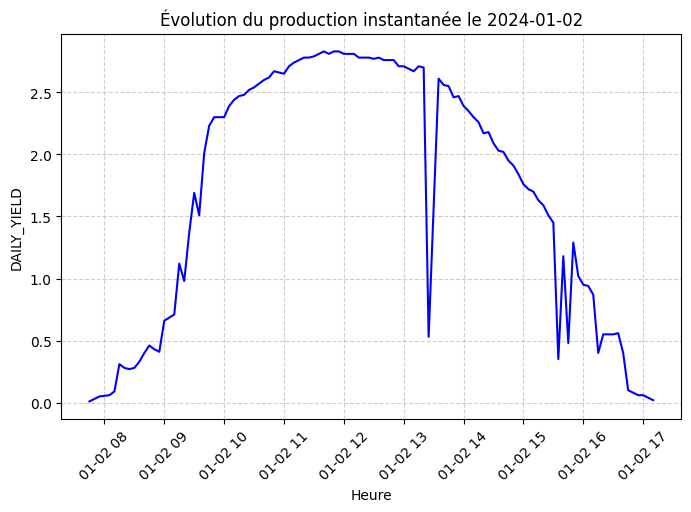

In [8]:
# Tracer la distribution de DAILY_YIELD
date_cible="02-01-2024"
# Conversion de la date cible en date
date_cible = pd.to_datetime(date_cible, format="%d-%m-%Y").date()

# Filtrer le DataFrame sur la date choisie
df_jour = df[df['time'].dt.date == date_cible]

plt.figure(figsize=(8,5))
plt.plot(df_jour['time'], df_jour['solar_power_kw'], linestyle='-', color='blue')

plt.title(f"Évolution du production instantanée le {date_cible}")
plt.xlabel("Heure")
plt.ylabel("DAILY_YIELD")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

Full Correlation Matrix (first 5 rows and columns):
                      solar_power_kw  temperature_2m  relative_humidity_2m  \
solar_power_kw                 1.000           0.306                -0.384   
temperature_2m                 0.306           1.000                -0.672   
relative_humidity_2m          -0.384          -0.672                 1.000   
cloud_cover                   -0.200          -0.142                 0.165   
shortwave_radiation            0.728           0.615                -0.616   

                      cloud_cover  shortwave_radiation  
solar_power_kw             -0.200                0.728  
temperature_2m             -0.142                0.615  
relative_humidity_2m        0.165               -0.616  
cloud_cover                 1.000               -0.192  
shortwave_radiation        -0.192                1.000  


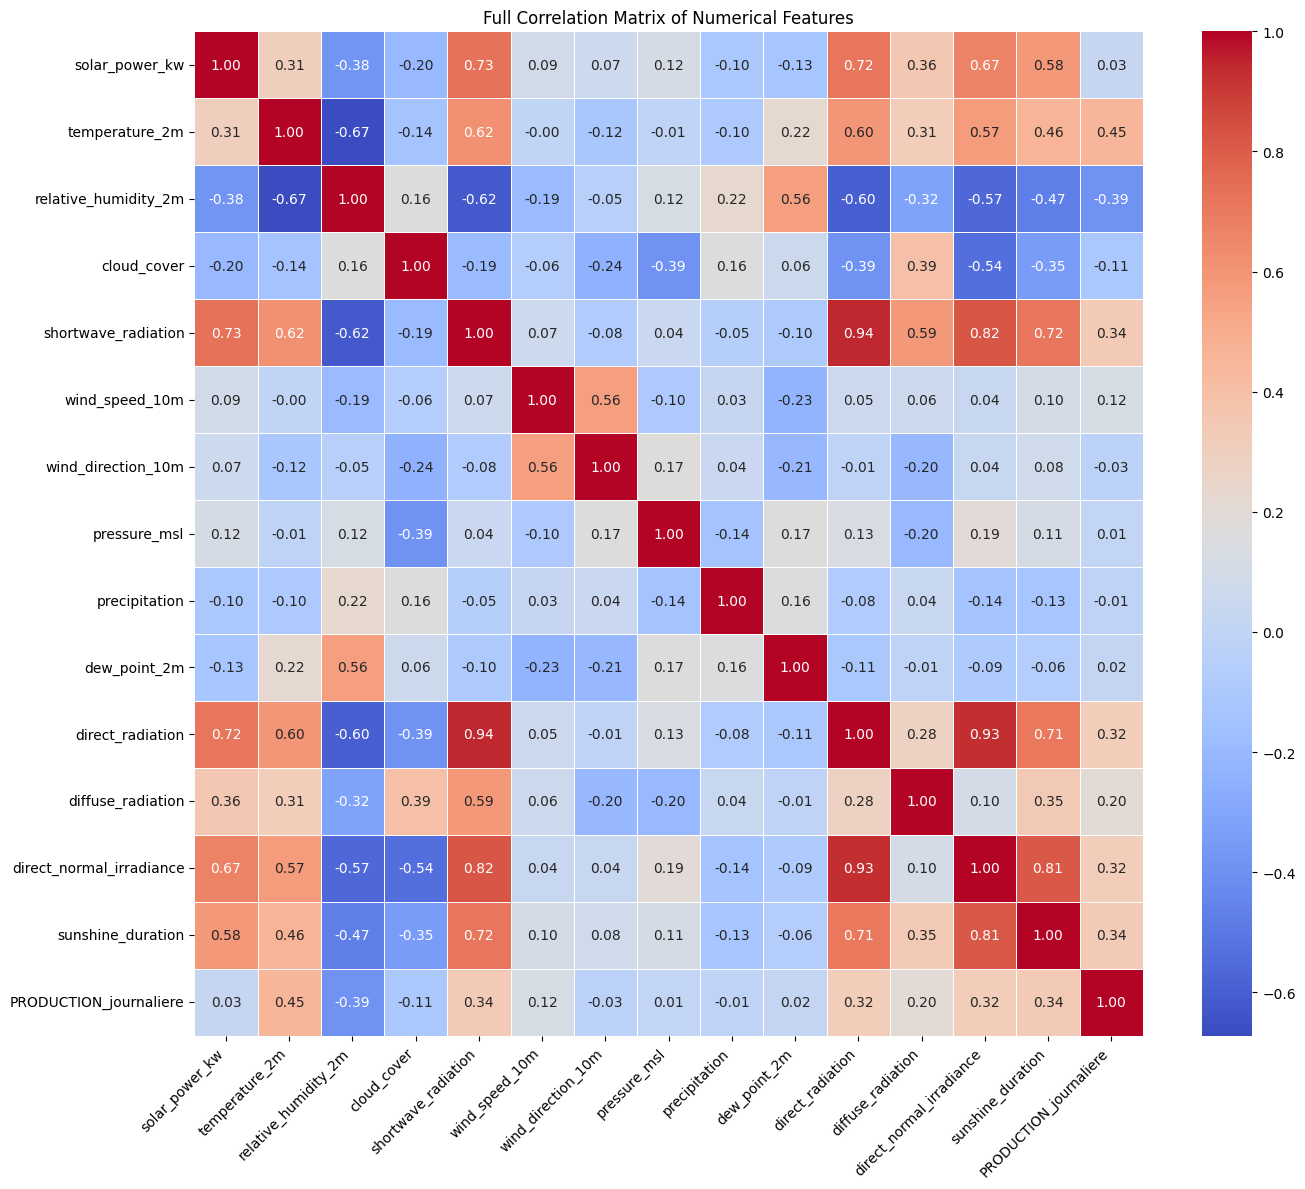

In [9]:
#overall coorrelation
numerical_cols_all = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the full correlation matrix
correlation_matrix = df[numerical_cols_all].corr()

print("Full Correlation Matrix (first 5 rows and columns):")
print(correlation_matrix.iloc[:5, :5])

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Full Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

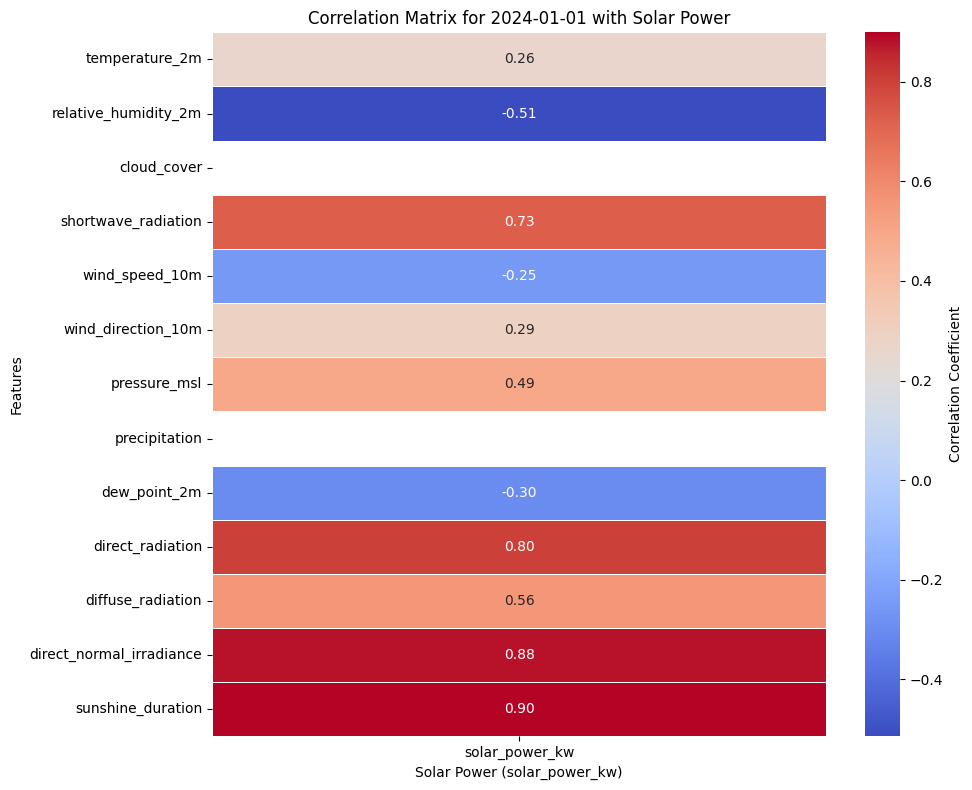

In [10]:
date_to_visualize = '2024-01-01'

# Convert the chosen date string to a datetime object for comparison
selected_date = pd.to_datetime(date_to_visualize).date()

# Calculate correlation for the specific day
df_day_specific = df[df['time'].dt.date == selected_date].copy()

# Exclude 'time', 'date' and 'PRODUCTION_journaliere' columns for correlation calculation
numerical_cols_daily = df_day_specific.select_dtypes(include=np.number).columns.drop(['PRODUCTION_journaliere']).tolist()

if not df_day_specific.empty and 'solar_power_kw' in numerical_cols_daily:
    # Calculate correlations of all numerical features with 'solar_power_kw' for the day
    correlation_for_day = df_day_specific[numerical_cols_daily].corr()['solar_power_kw'].drop('solar_power_kw')

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_for_day.to_frame(), # Convert to DataFrame for heatmap
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    plt.title(f'Correlation Matrix for {selected_date} with Solar Power')
    plt.xlabel('Solar Power (solar_power_kw)')
    plt.ylabel('Features')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print(f"No data available or 'solar_power_kw' not found for the selected date: {date_to_visualize}")

In [11]:
correlation_threshold = 0.5

# Calculate correlations of all numerical features with 'solar_power_kw'
# 'correlation_matrix' was defined in cell 9cfaa508
correlations_with_target = correlation_matrix['solar_power_kw'].drop('solar_power_kw')

# Sort correlations by absolute value for easier filtering
sorted_correlations = correlations_with_target.abs().sort_values(ascending=False)

# Filter features based on the absolute correlation threshold
strongly_correlated_features = sorted_correlations[sorted_correlations >= correlation_threshold].index.tolist()

# Ensure 'solar_power_kw' is not included in the features list if it somehow made it there
if 'solar_power_kw' in strongly_correlated_features:
    strongly_correlated_features.remove('solar_power_kw')

# Add the target variable to the list of selected columns
selected_columns = strongly_correlated_features + ['solar_power_kw']

# Create a new DataFrame with only the selected features and the target variable
df_selected_features = df[selected_columns].copy()

print(f"Selected features (absolute correlation >= {correlation_threshold}):")
print(strongly_correlated_features)

print("\nFirst 5 rows of df_selected_features:")
print(df_selected_features.head())

Selected features (absolute correlation >= 0.5):
['shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance', 'sunshine_duration']

First 5 rows of df_selected_features:
   shortwave_radiation  direct_radiation  direct_normal_irradiance  \
0                4.000             0.500                     6.650   
1                4.667             0.583                     7.758   
2                5.333             0.667                     8.867   
3                6.000             0.750                     9.975   
4                6.667             0.833                    11.083   

   sunshine_duration  solar_power_kw  
0              0.000           0.050  
1              0.000           0.050  
2              0.000           0.240  
3              0.000           0.400  
4              0.000           0.510  


In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_selected_features.drop('solar_power_kw', axis=1)
y = df_selected_features['solar_power_kw']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5961, 4)
Shape of X_test: (1491, 4)
Shape of y_train: (5961,)
Shape of y_test: (1491,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform X_train
X_train_imputed = imputer.fit_transform(X_train)
# Transform X_test using the imputer fitted on X_train
X_test_imputed = imputer.transform(X_test)

# 1. Instantiate a LinearRegression model
model = LinearRegression()

# 2. Train the model using X_train_imputed and y_train
model.fit(X_train_imputed, y_train)

# 3. Make predictions on X_test_imputed
y_pred = model.predict(X_test_imputed)

# 4. Calculate the R-squared score, Mean Absolute Error (MAE), and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# 5. Print the calculated R-squared, MAE, and MSE scores
print(f"Linear Regression Model Performance:\n")
print(f"R-squared: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

Linear Regression Model Performance:

R-squared: 0.524
Mean Absolute Error (MAE): 0.585
Mean Squared Error (MSE): 0.503


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Instantiate a RandomForestRegressor model
# Set random_state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# 2. Train the model using X_train_imputed and y_train
rf_model.fit(X_train_imputed, y_train)

# 3. Make predictions on X_test_imputed
y_pred_rf = rf_model.predict(X_test_imputed)

# 4. Calculate the R-squared score, Mean Absolute Error (MAE), and Mean Squared Error (MSE)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# 5. Print the calculated R-squared, MAE, and MSE scores
print(f"Random Forest Regressor Model Performance:\n")
print(f"R-squared: {r2_rf:.3f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.3f}")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")

Random Forest Regressor Model Performance:

R-squared: 0.509
Mean Absolute Error (MAE): 0.558
Mean Squared Error (MSE): 0.518


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Instantiate a GradientBoostingRegressor model
# Set random_state for reproducibility
gbr_model = GradientBoostingRegressor(random_state=42)

# 2. Train the model using X_train_imputed and y_train
gbr_model.fit(X_train_imputed, y_train)

# 3. Make predictions on X_test_imputed
y_pred_gbr = gbr_model.predict(X_test_imputed)

# 4. Calculate the R-squared score, Mean Absolute Error (MAE), and Mean Squared Error (MSE)
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

# 5. Print the calculated R-squared, MAE, and MSE scores
print(f"Gradient Boosting Regressor Model Performance:\n")
print(f"R-squared: {r2_gbr:.3f}")
print(f"Mean Absolute Error (MAE): {mae_gbr:.3f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.3f}")

Gradient Boosting Regressor Model Performance:

R-squared: 0.552
Mean Absolute Error (MAE): 0.565
Mean Squared Error (MSE): 0.473


In [16]:
model_performance = {
    'Linear Regression': {
        'R-squared': r2,
        'MAE': mae,
        'MSE': mse
    },
    'Random Forest Regressor': {
        'R-squared': r2_rf,
        'MAE': mae_rf,
        'MSE': mse_rf
    },
    'Gradient Boosting Regressor': {
        'R-squared': r2_gbr,
        'MAE': mae_gbr,
        'MSE': mse_gbr
    }
}

performance_df = pd.DataFrame(model_performance).T

print("Model Performance Comparison:")
print(performance_df)

Model Performance Comparison:
                             R-squared   MAE   MSE
Linear Regression                0.524 0.585 0.503
Random Forest Regressor          0.509 0.558 0.518
Gradient Boosting Regressor      0.552 0.565 0.473


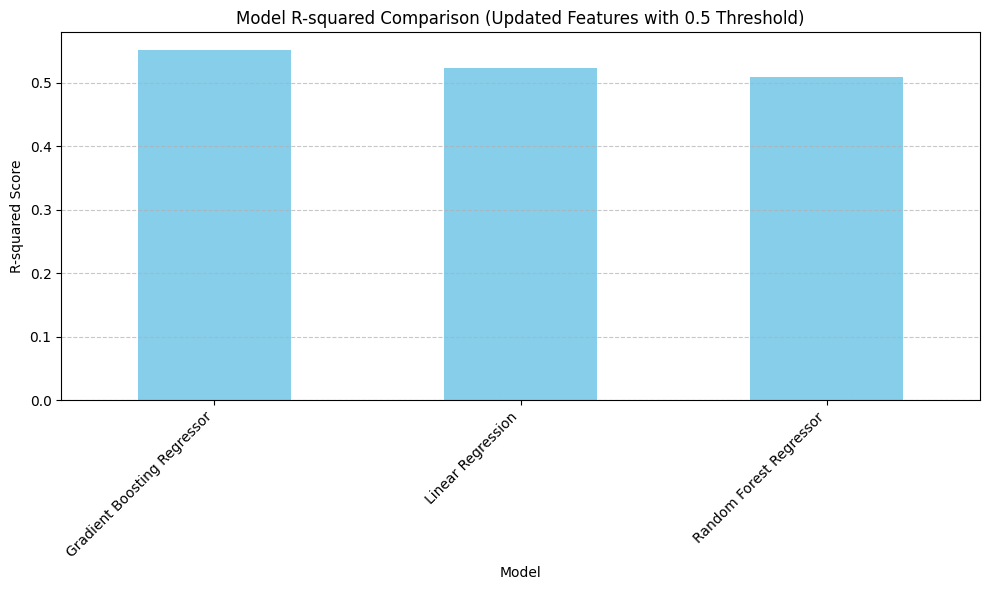

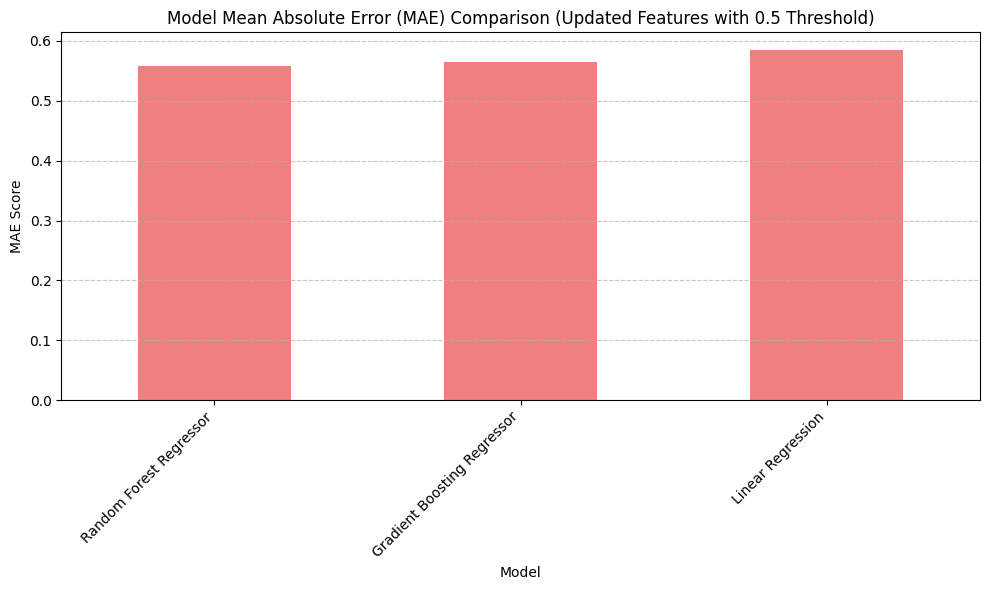

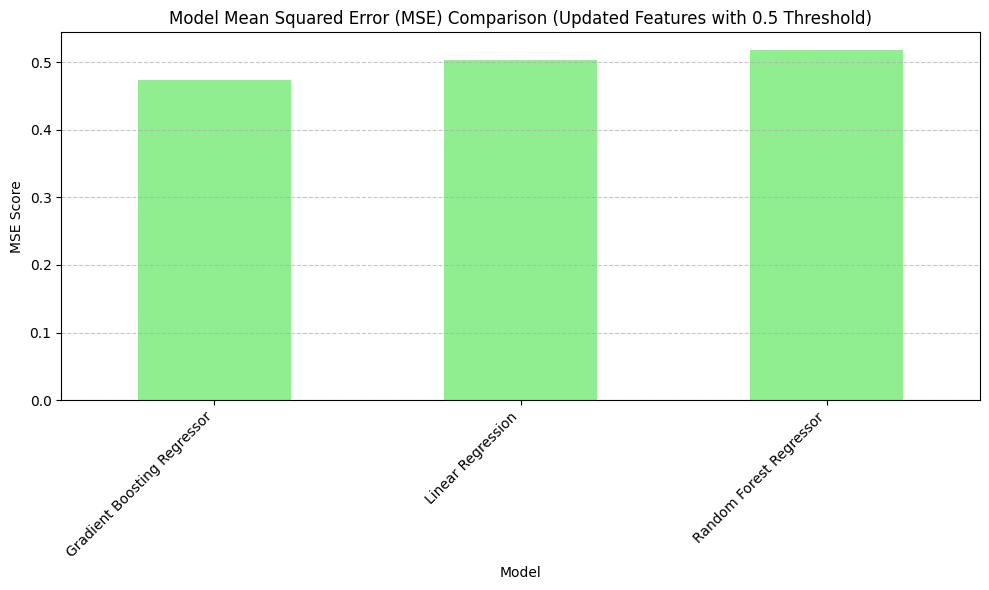

In [17]:
import matplotlib.pyplot as plt

# Plot R-squared scores
plt.figure(figsize=(10, 6))
performance_df['R-squared'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Model R-squared Comparison (Updated Features with 0.5 Threshold)')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot MAE scores
plt.figure(figsize=(10, 6))
performance_df['MAE'].sort_values(ascending=True).plot(kind='bar', color='lightcoral')
plt.title('Model Mean Absolute Error (MAE) Comparison (Updated Features with 0.5 Threshold)')
plt.xlabel('Model')
plt.ylabel('MAE Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot MSE scores
plt.figure(figsize=(10, 6))
performance_df['MSE'].sort_values(ascending=True).plot(kind='bar', color='lightgreen')
plt.title('Model Mean Squared Error (MSE) Comparison (Updated Features with 0.5 Threshold)')
plt.xlabel('Model')
plt.ylabel('MSE Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Metric-wise comparison

🔹 R-squared (Explained variance)

Best: Gradient Boosting (0.552)

Indicates superior modeling of complex, non-linear relationships

Linear Regression performs reasonably but is limited by linearity

Winner: 🥇 Gradient Boosting

🔹 MAE (Average prediction error)

Best: Random Forest (0.558)

More stable predictions on average

Gradient Boosting slightly worse, Linear Regression the weakest

Winner: 🥇 Random Forest

🔹MSE (Large error penalty)

Best: Gradient Boosting (0.473)

Indicates fewer large mistakes

Random Forest struggles more with outliers

🔹Winner: 🥇 Gradient Boosting

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# 1. Define the parameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 4, 5]  # Maximum depth of the individual regression estimators
}

# 2. Instantiate GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# 3. Instantiate GridSearchCV
# Using 'neg_mean_squared_error' for scoring as GridSearchCV maximizes the score, so we want to minimize MSE.
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# 4. Fit GridSearchCV to the training data
print("Starting GridSearchCV...")
grid_search.fit(X_train_imputed, y_train)
print("GridSearchCV completed.")

# 5. Print the best parameters found
print("\nBest parameters found:", grid_search.best_params_)

# 6. Print the best cross-validation score (negative MSE, so convert to positive MSE for interpretability)
print("Best cross-validation MSE:", -grid_search.best_score_)

Starting GridSearchCV...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
GridSearchCV completed.

Best parameters found: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation MSE: 0.4666659833474068



Feature Importances from Optimized Gradient Boosting Regressor:
shortwave_radiation        0.738
direct_radiation           0.152
direct_normal_irradiance   0.062
sunshine_duration          0.049
dtype: float64


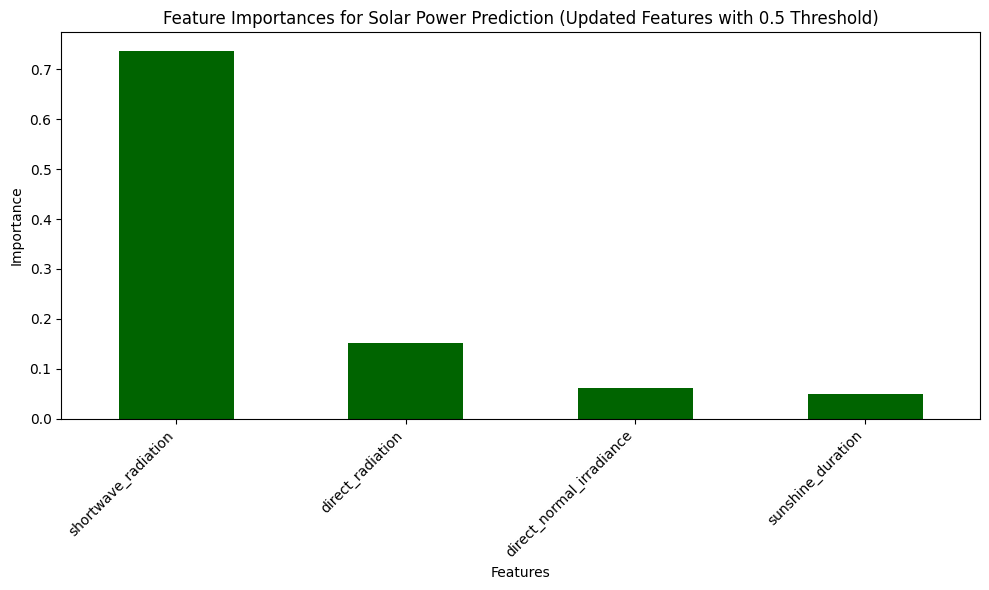

In [19]:
import matplotlib.pyplot as plt

# 1. Access the best estimator from the grid_search object
best_gbr_model = grid_search.best_estimator_

# 2. Extract the feature importances from the best estimator
feature_importances = best_gbr_model.feature_importances_

# 3. Create a Pandas Series of feature importances, mapping them to the original feature names from X_train
feature_names = X_train.columns
importance_series = pd.Series(feature_importances, index=feature_names)

# 4. Sort the feature importances in descending order
sorted_importance = importance_series.sort_values(ascending=False)

# 5. Print the sorted feature importances
print("\nFeature Importances from Optimized Gradient Boosting Regressor:")
print(sorted_importance)

# 6. Create a bar plot of the sorted feature importances
plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='bar', color='darkgreen')
plt.title('Feature Importances for Solar Power Prediction (Updated Features with 0.5 Threshold)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

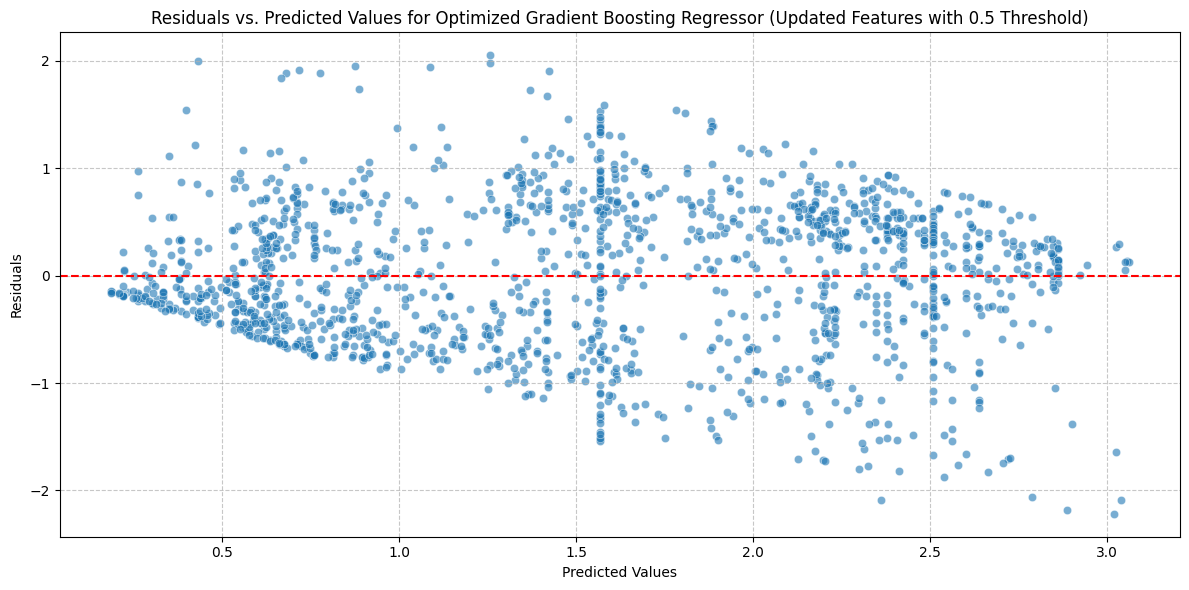

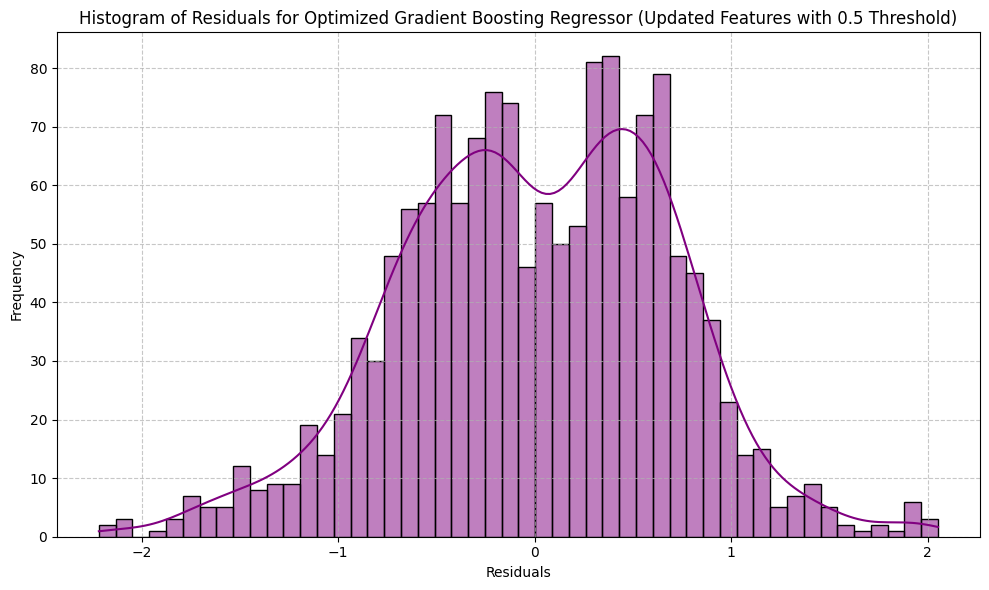

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the X_test_imputed data using the best_gbr_model
y_pred_best_gbr = best_gbr_model.predict(X_test_imputed)

# Calculate the residuals
residuals = y_test - y_pred_best_gbr

# 1. Create a scatter plot of the residuals against the predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred_best_gbr, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values for Optimized Gradient Boosting Regressor (Updated Features with 0.5 Threshold)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Create a histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=50)
plt.title('Histogram of Residuals for Optimized Gradient Boosting Regressor (Updated Features with 0.5 Threshold)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()